# Data Import and preperation

Import data.
Figure out the primary key and look for the requirement of indexing.
Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [1]:
## Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All Lib imported')

All Lib imported


In [2]:
## Import the data

train_set= pd.read_csv('train.csv')

In [3]:
train_set.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
train_set.shape

(27321, 80)

In [5]:
## Import the data

test_set= pd.read_csv('test.csv')

In [6]:
test_set.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [7]:
test_set.shape

(11709, 80)

In [8]:
train_set.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [9]:
train_set.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [10]:
train_set.set_index(keys= ['UID'], inplace=True)

In [11]:
test_set.set_index(keys= ['UID'], inplace=True)

In [12]:
train_set.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [13]:
test_set.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [14]:
train_set.isnull().sum().any()

True

In [15]:
train_set.isnull().sum()[train_set.isnull().sum()>0]

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

In [16]:
train_set['SUMLEVEL'].unique()

array([140])

In [17]:
train_set.drop(columns=['BLOCKID', 'SUMLEVEL'], inplace=True)
test_set.drop(columns=['BLOCKID', 'SUMLEVEL'], inplace=True)

In [18]:
train_set.shape

(27321, 77)

In [19]:
test_set.shape

(11709, 77)

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27321 entries, 267822 to 265371
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     27321 non-null  int64  
 1   STATEID                      27321 non-null  int64  
 2   state                        27321 non-null  object 
 3   state_ab                     27321 non-null  object 
 4   city                         27321 non-null  object 
 5   place                        27321 non-null  object 
 6   type                         27321 non-null  object 
 7   primary                      27321 non-null  object 
 8   zip_code                     27321 non-null  int64  
 9   area_code                    27321 non-null  int64  
 10  lat                          27321 non-null  float64
 11  lng                          27321 non-null  float64
 12  ALand                        27321 non-null  float64
 13  AWater         

In [21]:
## Create a list of column which have missiong value

missing_col_train=[]
for col in train_set.columns:
    if train_set[col].isna().sum()!=0:
        missing_col_train.append(col)

In [22]:
print(missing_col_train)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [23]:
len(missing_col_train)

58

In [24]:
test_set.isnull().sum()[test_set.isnull().sum()>0]

rent_mean                      148
rent_median                    148
rent_stdev                     148
rent_sample_weight             148
rent_samples                   148
rent_gt_10                     149
rent_gt_15                     149
rent_gt_20                     149
rent_gt_25                     149
rent_gt_30                     149
rent_gt_35                     149
rent_gt_40                     149
rent_gt_50                     149
hi_mean                        122
hi_median                      122
hi_stdev                       122
hi_sample_weight               122
hi_samples                     122
family_mean                    136
family_median                  136
family_stdev                   136
family_sample_weight           136
family_samples                 136
hc_mortgage_mean               268
hc_mortgage_median             268
hc_mortgage_stdev              268
hc_mortgage_sample_weight      268
hc_mortgage_samples            268
hc_mean             

In [25]:
missing_col_test=[]
for col in test_set.columns:
    if test_set[col].isna().sum()!=0:
        missing_col_test.append(col)

In [26]:
print(missing_col_test)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [27]:
len(missing_col_test)

58

In [28]:
## Impute the missing value with mean

for col in train_set.columns:
    if col in (missing_col_train):
        train_set[col].fillna(train_set[col].mean(), inplace = True)

In [29]:
train_set.isnull().sum().any()

False

In [30]:
## Impute the missing value with mean

for col in test_set.columns:
    if col in (missing_col_test):
        test_set[col].fillna(test_set[col].mean(), inplace = True)

In [31]:
test_set.isnull().sum().any()

False

## Exploratory Data Analysis (EDA):

    4.Perform debt analysis. You may take the following steps:

 a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

e) Create a collated income distribution chart for family income, house hold income, and remaining income



In [32]:
new_data= train_set[(train_set['second_mortgage']>0.10) & (train_set['second_mortgage']<=0.50)]

In [33]:
new_data.shape

(839, 77)

In [34]:
sorted_data= new_data.sort_values(by= 'second_mortgage', ascending= False)

In [35]:
top_location= sorted_data.head(2500)

In [36]:
top_location

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
252303,33,24,Maryland,MD,Mt Rainier,Mount Rainier City,CDP,tract,20712,301,...,30.38271,29.75000,17.61793,315.01226,1298.0,0.03476,0.37935,0.15006,0.12245,0.16807
234209,1,11,District of Columbia,DC,Oxon Hill,Washington City,City,tract,20745,301,...,30.47360,24.16667,18.90959,740.21037,2491.0,0.01374,0.15815,0.08191,0.03893,0.12814
289712,147,51,Virginia,VA,Farmville,Farmville,Town,tract,23901,434,...,19.58762,19.16667,4.00258,673.39577,1124.0,0.62069,0.03612,0.01806,0.01806,0.00000
225301,37,6,California,CA,Van Nuys,Burbank City,City,tract,91401,818,...,30.29749,29.91667,18.78334,709.49784,2782.0,0.03302,0.40964,0.11320,0.03046,0.07056
222830,13,4,Arizona,AZ,Scottsdale,Tempe City,CDP,tract,85257,480,...,31.91429,30.83333,14.45269,229.39846,981.0,0.05660,0.21531,0.10204,0.07347,0.20816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269326,81,36,New York,NY,Hollis,Bellerose Terrace,City,tract,11423,718,...,42.83407,44.75000,21.78922,228.47991,988.0,0.73593,0.44227,0.17584,0.08526,0.07993
241623,155,19,Iowa,IA,Council Bluffs,Council Bluffs City,City,tract,51501,712,...,44.29763,45.41667,25.26177,439.72453,1813.0,0.79766,0.58579,0.05459,0.02080,0.11005
242268,31,17,Illinois,IL,Chicago,Evanston City,Village,tract,60645,773,...,37.85017,37.58333,23.38098,557.14936,2242.0,0.50559,0.53185,0.03264,0.00876,0.10987


In [37]:
top_location['second_mortgage'].value_counts()


second_mortgage
0.12500    7
0.11765    7
0.10345    4
0.50000    3
0.10606    3
          ..
0.13571    1
0.13554    1
0.13538    1
0.13525    1
0.10009    1
Name: count, Length: 744, dtype: int64

# Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [38]:
train_set['bad_debt']= train_set['second_mortgage']+train_set['home_equity']-train_set['home_equity_second_mortgage']

In [39]:
train_set['bad_debt'].values

array([0.09408, 0.04274, 0.09512, ..., 0.07857, 0.14305, 0.18362])

<Axes: >

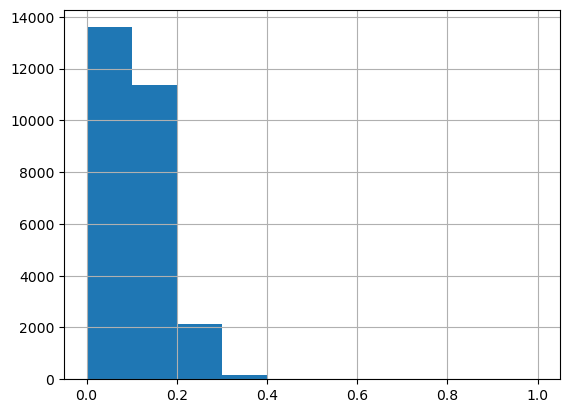

In [40]:
train_set['bad_debt'].hist()

In [41]:
train_set['bad_debt'].value_counts

<bound method IndexOpsMixin.value_counts of UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debt, Length: 27321, dtype: float64>

In [42]:
train_set['bad_debt']

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: bad_debt, Length: 27321, dtype: float64

In [43]:
train_set['bins']=pd.cut(train_set['bad_debt'], bins=[0,0.10,1], labels=['lesss than 50%', '50% to 100%'])

In [44]:
train_set.groupby('bins').size()

bins
lesss than 50%    12179
50% to 100%       13713
dtype: int64

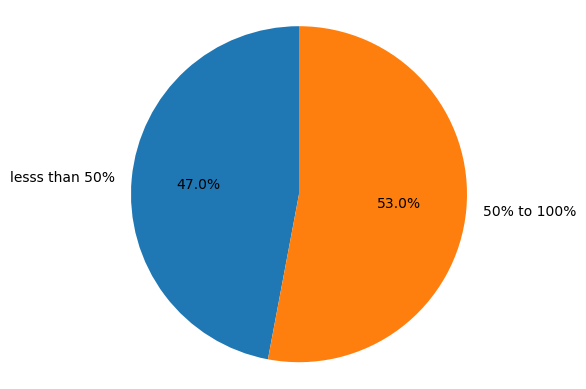

In [45]:
train_set.groupby('bins').size().plot(kind= 'pie', subplots=True, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [46]:
train_set['city'].unique()

array(['Hamilton', 'South Bend', 'Danville', ..., 'Blue Bell', 'Weldona',
       'Colleyville'], dtype=object)

In [47]:
df_box_Hamilton= train_set.loc[train_set['city']=='Hamilton']
df_box_Danville=train_set.loc[train_set['city']=='Danville']

In [48]:
df_box_city= pd.concat([df_box_Hamilton, df_box_Danville])

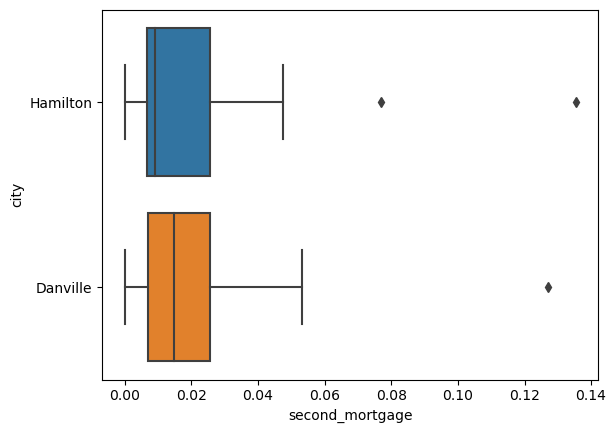

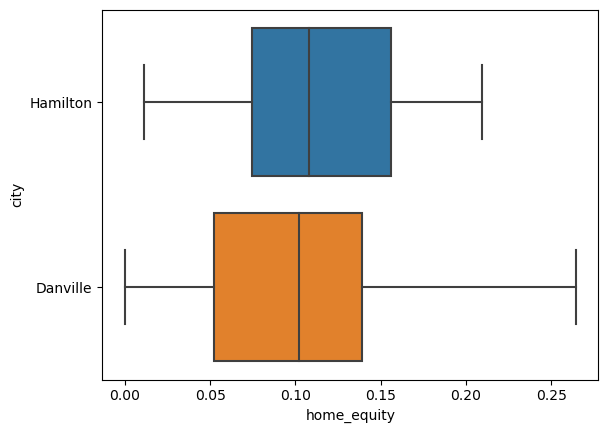

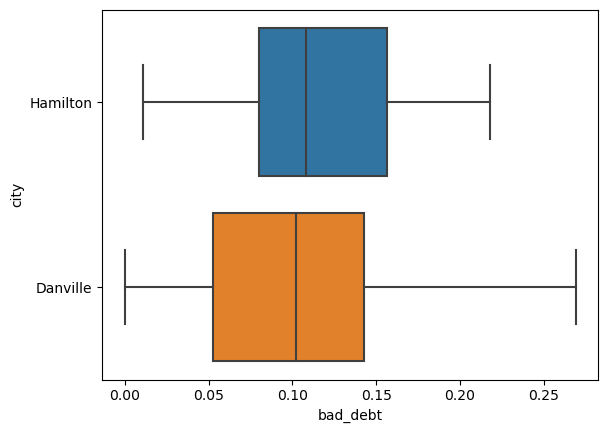

In [49]:
i= ['second_mortgage', 'home_equity', 'bad_debt']
for col in i:
    sns.boxplot(data= df_box_city, x=df_box_city[col], y=df_box_city['city'])
    plt.show()


/Users/shaktipathak/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


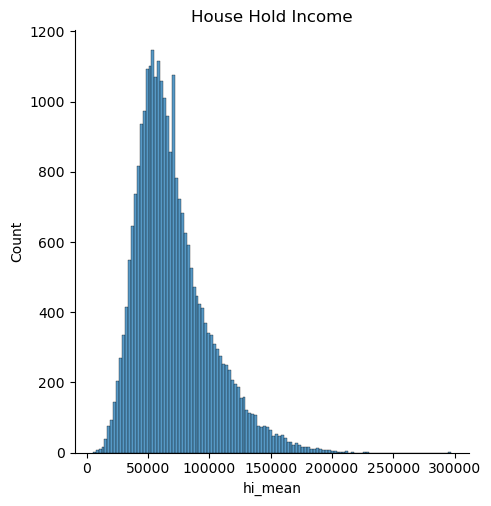

/Users/shaktipathak/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


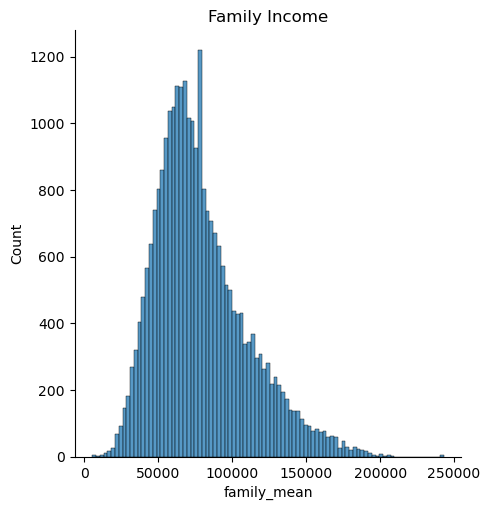

/Users/shaktipathak/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


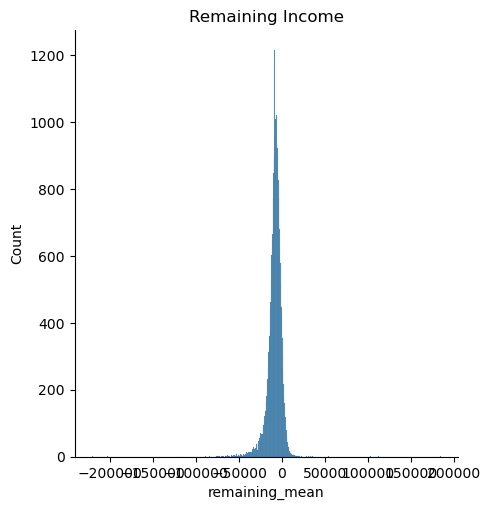

In [50]:
## Creating distrubtion chart for house hold income
train_set['remaining_mean']= train_set['hi_mean']-train_set['family_mean']
i=['hi_mean', 'family_mean', 'remaining_mean']
for col in i:
    sns.displot(train_set[col])
    if col=='hi_mean':
        plt.title('House Hold Income')
    elif col=='family_mean':
        plt.title('Family Income')
    elif col=='remaining_mean':
        plt.title('Remaining Income')
    plt.show()


## Exploratory Data Analysis (EDA):

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

a) Use pop and ALand variables to create a new field called population density

b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

a) Analyze the married, separated, and divorced population for these population brackets

b) Visualize using appropriate chart type

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

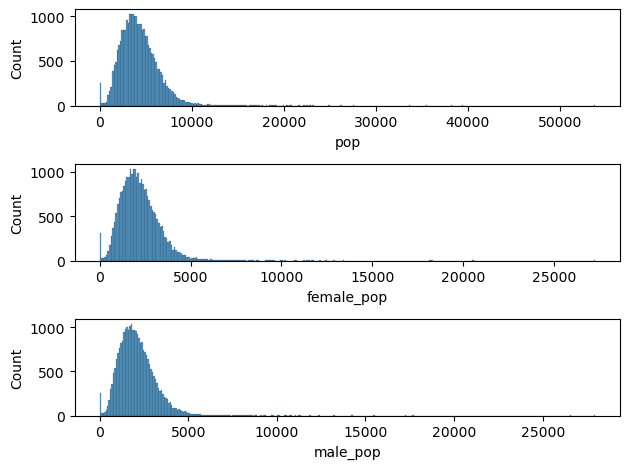

In [51]:
fig,(ax1, ax2,ax3)=plt.subplots(3,1)
sns.histplot(train_set['pop'], ax=ax1)
sns.histplot(train_set['female_pop'], ax=ax2)
sns.histplot(train_set['male_pop'], ax=ax3)
plt.subplots_adjust(wspace=0.8, hspace=0.8)
plt.tight_layout()
plt.show()

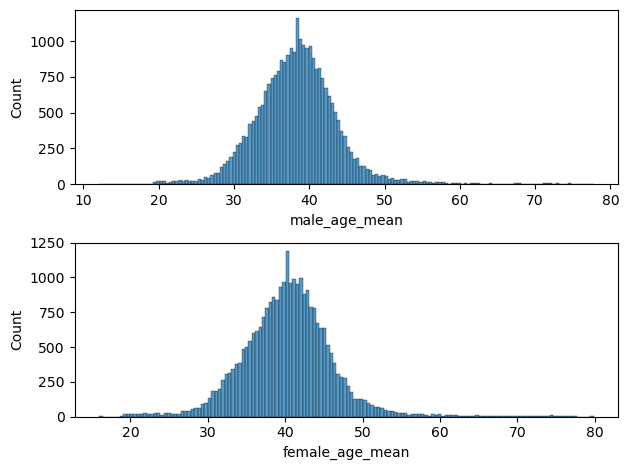

In [52]:
fig,(ax1, ax2)=plt.subplots(2,1)
sns.histplot(train_set['male_age_mean'], ax=ax1)
sns.histplot(train_set['female_age_mean'], ax=ax2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)
plt.tight_layout()
plt.show()

In [53]:
train_set['pop_density']= train_set['pop']/train_set['ALand']
test_set['pop_density']=test_set['pop']/test_set['ALand']

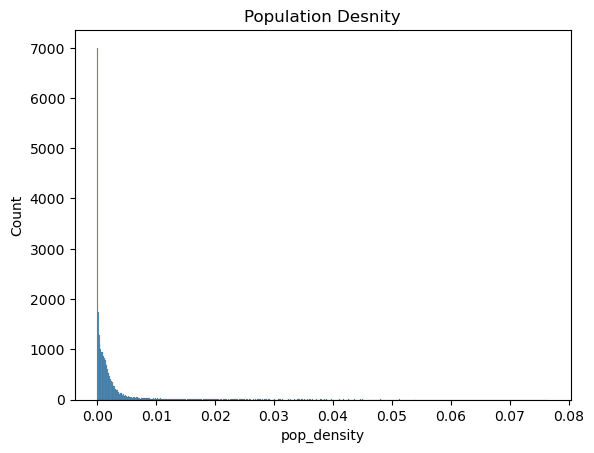

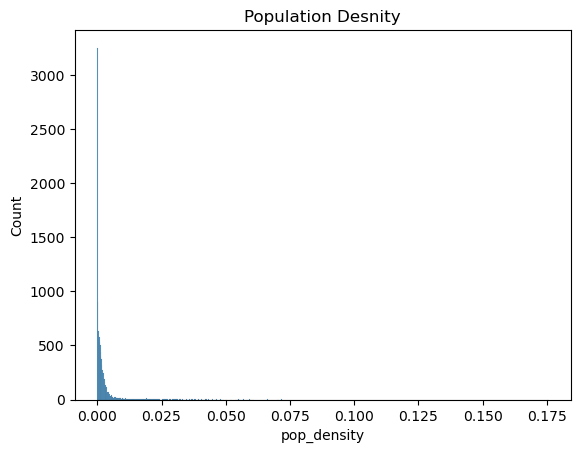

In [54]:
sns.histplot(train_set['pop_density'])
plt.title('Population Desnity')
plt.show()
sns.histplot(test_set['pop_density'])
plt.title('Population Desnity')
plt.show()##nVery less density

In [69]:
df_combine= pd.concat([train_set, test_set])

In [70]:
df_combine.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,pct_own,married,married_snp,separated,divorced,bad_debt,bins,remaining_mean,pop_density,age_median
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,lesss than 50%,-4868.86384,0.000026,43.486015
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,lesss than 50%,-8738.17744,0.001687,35.665595
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,lesss than 50%,-10319.83114,0.000099,40.769820
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,lesss than 50%,-7668.01017,0.002442,48.211375
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,lesss than 50%,-22219.26930,0.002207,25.126130


In [71]:
df_combine.shape

(39030, 82)

In [72]:
test_set.shape

(11709, 79)

In [73]:
train_set.shape

(27321, 82)

In [74]:
df_combine.isnull().sum()

COUNTYID              0
STATEID               0
state                 0
state_ab              0
city                  0
                  ...  
bad_debt          11709
bins              13138
remaining_mean    11709
pop_density           0
age_median            0
Length: 82, dtype: int64

In [75]:
df_combine['age_median']= ((df_combine['male_age_median']*df_combine['male_pop'])+
(df_combine['female_age_mean']*df_combine['female_pop']))/(df_combine['male_pop']+df_combine['female_pop'])

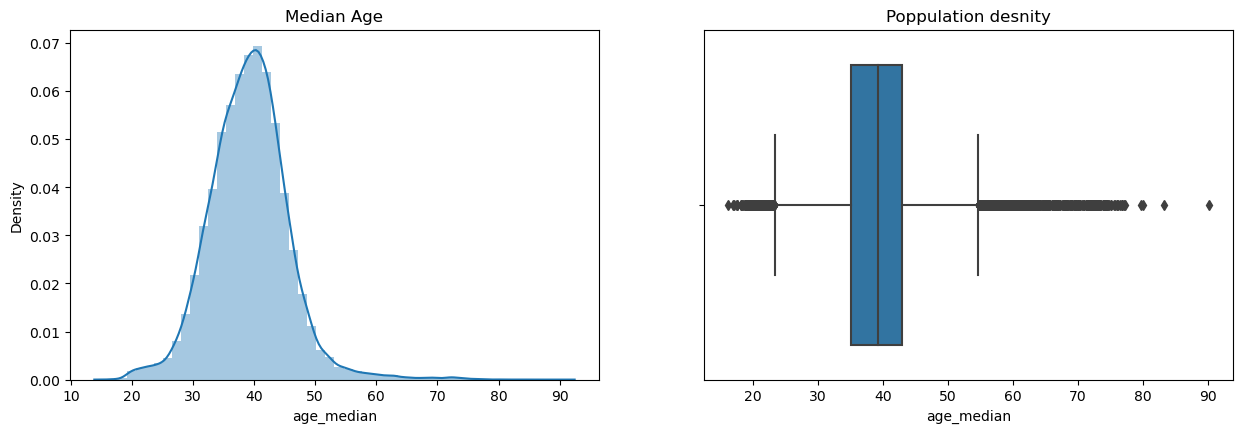

In [80]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(df_combine['age_median'])
plt.title('Median Age')
plt.subplot(2,2,2)
sns.boxplot(x=df_combine['age_median'])
plt.title('Poppulation desnity')
plt.show()

In [82]:
df_combine['pop_bin']=pd.cut(df_combine['pop'], bins=5, labels=['very low', 'low', 'medium', 'high', 'very high'])

In [83]:
df_combine['pop_bin'].value_counts()

pop_bin
very low     38661
low            348
medium          12
high             8
very high        1
Name: count, dtype: int64

In [88]:
df_combine.groupby(by='pop_bin')[['married', 'separated', 'divorced']].count()

,married,separated,divorced
pop_bin,,,
very low,38661,38661,38661
low,348,348,348
medium,12,12,12
high,8,8,8
very high,1,1,1


In [98]:
df_combine.groupby(by='pop_bin')[['married', 'separated', 'divorced']].agg(["mean", "median"])

married           separated            divorced         
               mean    median      mean    median      mean   median
pop_bin                                                             
very low   0.506729  0.524210  0.019209  0.013770  0.100177  0.09567
low        0.589247  0.601815  0.014929  0.010255  0.075192  0.06934
medium     0.617047  0.605765  0.011203  0.007745  0.071870  0.06909
high       0.482396  0.335660  0.007436  0.002500  0.035441  0.01032
very high  0.734740  0.734740  0.004050  0.004050  0.030360  0.03036

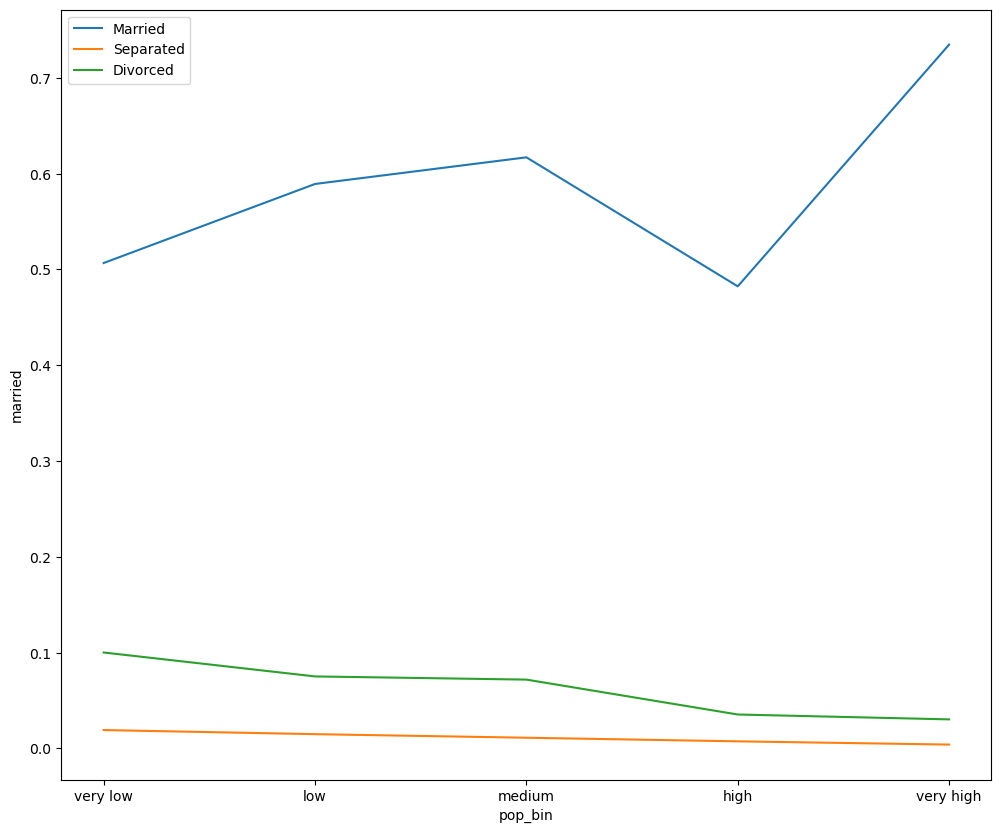

In [100]:
df_grouped= df_combine.groupby(by='pop_bin')[['married', 'separated', 'divorced']].mean()
plt.figure(figsize=(12,10))
sns.lineplot(data= df_grouped, x= 'pop_bin', y='married', label= 'Married')
sns.lineplot(data= df_grouped, x= 'pop_bin', y='separated', label= 'Separated')
sns.lineplot(data= df_grouped, x= 'pop_bin', y='divorced', label= 'Divorced')
plt.legend(loc='best')
plt.show()

<Axes: >

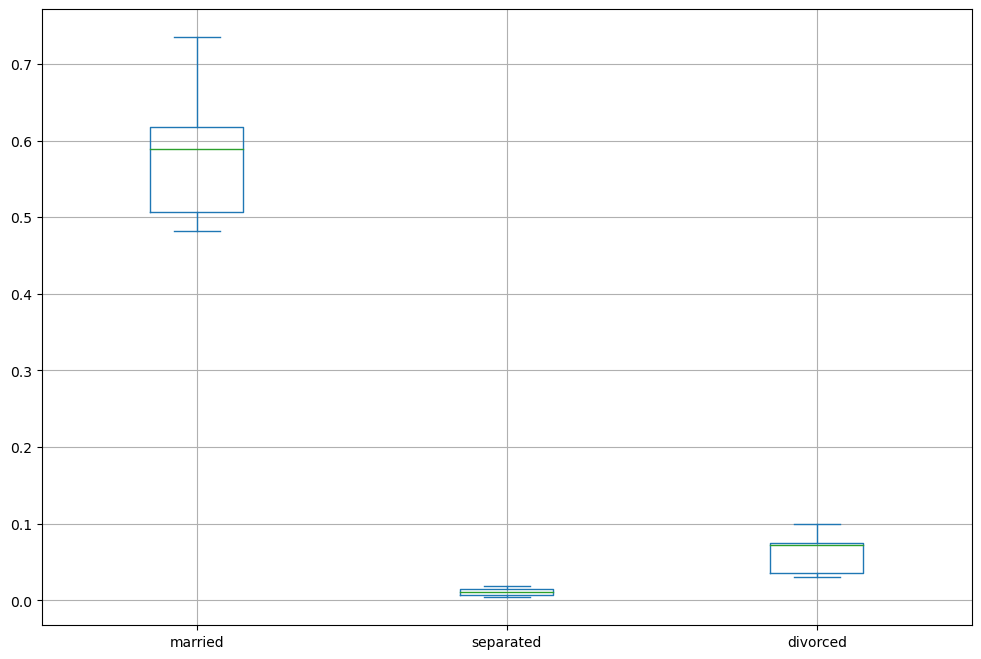

In [103]:
df_combine.groupby(by='pop_bin')[['married', 'separated', 'divorced']].mean().plot.box(figsize=(12,8), grid=True)


In [107]:
rent_state_mean= df_combine.groupby(by='state')['rent_mean'].agg(['mean'])
rent_state_mean.head()

,mean
state,
Alabama,766.373317
Alaska,1190.093590
Arizona,1085.448869
Arkansas,718.970584
California,1464.310220


In [109]:
income_state_mean=df_combine.groupby(by='state')['family_mean'].agg(['mean'])
income_state_mean.head()

,mean
state,
Alabama,65341.572647
Alaska,91911.137520
Arizona,73049.029032
Arkansas,64516.688401
California,87521.859712


In [111]:
rent_perc_of_income= rent_state_mean/income_state_mean*100
rent_perc_of_income.head(10)

,mean
state,
Alabama,1.172872
Alaska,1.294831
Arizona,1.485918
Arkansas,1.114395
California,1.673079
Colorado,1.361258
Connecticut,1.274466
Delaware,1.311808
District of Columbia,1.357334


In [113]:
sum(df_combine['rent_mean'])/sum(df_combine['family_mean'])

0.01336978883332846

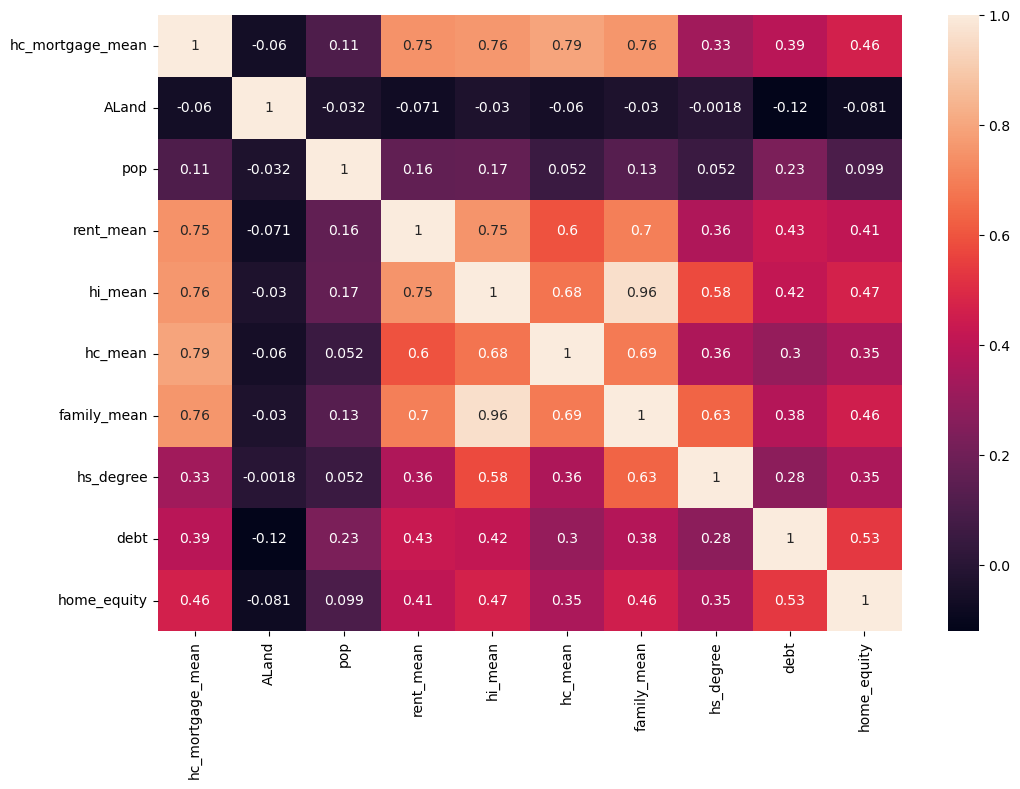

In [115]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df_combine[['hc_mortgage_mean', 'ALand', 'pop', 'rent_mean', 'hi_mean' ,'hc_mean' ,
                             'family_mean', 'hs_degree' ,'debt' ,'home_equity']].corr(), annot=True)
plt.show()

In [116]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=7b3f82e553d09a124f0ce6c01a8378c57506c943346c2d2b22b864e6dc5e9f8f
  Stored in directory: /Users/shaktipathak/Library/Caches/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [117]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [118]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
COUNTYID,27321.0,85.646426,98.333097,1.000000,29.000000,63.000000,109.000000,840.000000
STATEID,27321.0,28.271806,16.392846,1.000000,13.000000,28.000000,42.000000,72.000000
zip_code,27321.0,50081.999524,29558.115660,602.000000,26554.000000,47715.000000,77093.000000,99925.000000
area_code,27321.0,596.507668,232.497482,201.000000,405.000000,614.000000,801.000000,989.000000
lat,27321.0,37.508813,5.588268,17.929085,33.899064,38.755183,41.380606,67.074017
...,...,...,...,...,...,...,...,...
divorced,27321.0,0.100248,0.048883,0.000000,0.066080,0.095640,0.128710,1.000000
bad_debt,27321.0,0.105099,0.070907,0.000000,0.052790,0.100330,0.148330,1.000000
remaining_mean,27321.0,-8546.347683,8673.104928,-220811.945230,-11675.463530,-7588.453550,-3820.262510,184643.357100
pop_density,27321.0,0.002067,0.004597,0.000000,0.000120,0.000851,0.002060,0.076536


In [119]:
fa= FactorAnalyzer(n_factors= 5)
fa.fit_transform(train_set.select_dtypes(exclude=('object', 'category')))
fa.loadings_

array([[-0.12625201,  0.01771427, -0.02329066, -0.06320425,  0.02458729],
       [-0.12711599,  0.01265855,  0.03281462, -0.15193612,  0.08825691],
       [-0.08145707,  0.04879203, -0.15181458, -0.05036843, -0.10415664],
       [ 0.00818719,  0.01706126,  0.00389366,  0.02854883, -0.02527497],
       [ 0.13517248, -0.09383362, -0.08857305, -0.14048025, -0.09205585],
       [-0.01411394, -0.03976176,  0.15751865,  0.00786014,  0.09982027],
       [-0.05578263, -0.02252885,  0.0355022 , -0.09517912,  0.03570714],
       [-0.0083295 , -0.01576075, -0.00296591, -0.04537518,  0.01588676],
       [ 0.08224547,  0.96028182, -0.06089051, -0.0037394 , -0.02378976],
       [ 0.07374488,  0.92103271, -0.08552541, -0.02532779, -0.02686951],
       [ 0.08715097,  0.95115115, -0.03304431,  0.01824582, -0.01954565],
       [ 0.76817812,  0.01060417, -0.03879558,  0.12756417, -0.12833834],
       [ 0.71624893,  0.00617168, -0.05137251,  0.12099796, -0.1430677 ],
       [ 0.69937848,  0.03206258,  0.0

In [120]:
train_set.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [121]:
train_set['type'].unique()

array(['City', 'Urban', 'Town', 'CDP', 'Village', 'Borough'], dtype=object)

In [123]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [124]:
train_set['type_enc']= le.fit_transform(train_set['type'])

In [126]:
train_set['type_enc'].value_counts()

type_enc
2    15237
3     3666
1     3658
5     3216
0     1226
4      318
Name: count, dtype: int64

In [127]:
train_set['type_enc'].unique()

array([2, 4, 3, 1, 5, 0])

In [128]:
test_set['type_enc']= le.fit_transform(test_set['type'])

In [129]:
test_set['type_enc'].unique()

array([1, 2, 0, 3, 5, 4])

In [143]:
feature_cols= ['COUNTYID','STATEID','zip_code','type_enc','pop',
'family_mean','second_mortgage', 'home_equity', 'debt','hs_degree',
              'pct_own', 'married','separated', 'divorced']

In [144]:
X_train= train_set[feature_cols]
Y_train= train_set['hc_mortgage_mean']

In [145]:
X_test=test_set[feature_cols]
Y_test=test_set['hc_mortgage_mean']

In [133]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score


In [134]:
X_train.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,
267822,53,36,13346,City,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,0.79046,0.57851,0.01240,0.08770
246444,141,18,46616,City,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,0.52483,0.34886,0.01426,0.09030
245683,63,18,46122,City,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,0.85331,0.64745,0.01607,0.10657
279653,127,72,927,Urban,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,0.65037,0.47257,0.02021,0.10106
247218,161,20,66502,City,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,0.13046,0.12356,0.00000,0.03109


In [136]:
X_test.head()

,COUNTYID,STATEID,zip_code,type,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,
255504,163,26,48239,CDP,3417,53802.87122,0.06443,0.07651,0.63624,0.91047,0.70252,0.28217,0.03813,0.14299
252676,1,23,4210,City,3796,85642.22095,0.01175,0.14375,0.64755,0.94290,0.85128,0.64221,0.00000,0.13377
276314,15,42,14871,Borough,3944,65694.06582,0.01316,0.06497,0.45395,0.89238,0.81897,0.59961,0.01358,0.10026
248614,231,21,42633,City,2508,44156.38709,0.00995,0.01741,0.41915,0.60908,0.84609,0.56953,0.04694,0.12489
286865,355,48,78410,Town,6230,123527.02420,0.00000,0.03440,0.63188,0.86297,0.79077,0.57620,0.00588,0.16379


In [146]:
sc= StandardScaler()


In [148]:
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.fit_transform(X_test)

In [149]:
lr=LinearRegression()

In [150]:
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [151]:
y_pred= lr.predict(X_test_scaled)

In [152]:
y_pred

array([ 988.15103986, 1564.18428777, 1216.05505651, ..., 1869.3744548 ,
       1434.60430261, 1141.39697342])

In [154]:
r2_score(Y_test, y_pred)

0.7167911007655994

In [155]:
mean_absolute_error(Y_test, y_pred)

238.3653344467801

In [156]:
mean_squared_error(Y_test, y_pred)

111492.81649725889

In [157]:
np.sqrt(mean_squared_error(Y_test, y_pred))

333.90540052125374

In [158]:
x_pred= lr.predict(X_train_scaled)

In [159]:
r2_score(Y_train, x_pred)

0.724736062083895

In [160]:
lr.coef_

array([-2.95223765e+01, -3.14965240e+01, -1.75579164e+01, -1.53845023e+01,
       -1.04799885e+00,  5.60982625e+02, -6.32229538e-02,  6.86545915e+01,
        1.11370397e+01, -1.16487677e+02, -1.87280177e+02,  1.16292342e+01,
        3.92053714e+00, -5.70903523e+01])

In [162]:
train_set['STATEID'].unique()

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [163]:
train_set['COUNTYID'].unique()

array([ 53, 141,  63, 127, 161,  79, 337,  45,  81,  37,  73,  51,  25,
       121,  99, 153,  19,  47, 209,   3,  97,  69,   7,  89,   1,   5,
        13,  86,   9, 101, 183,  67,  35, 115,  29,  17,  77,  65,  93,
        41, 109, 155,  59, 439, 133, 117, 215,  33,  71,  15,  11,  21,
       291,  31,  95,  75,  91, 163, 491,  27, 129, 113,  55, 111,  49,
        57, 105, 123, 241, 197, 290,  83, 157, 135,  20,  43,  39, 145,
       245, 329, 201, 191, 143,  61, 361, 103, 171, 227, 137, 119, 449,
       131,  85, 231, 221, 147, 740, 810, 189, 213, 670, 177, 257, 477,
       317, 159, 169, 173, 151,  87, 165, 355, 107, 453, 590, 650, 125,
       193,  23, 510, 267, 217, 710, 187, 175, 251, 167, 139, 347, 233,
       179, 479, 321, 313, 149, 339, 427, 680, 277, 325, 770,  78, 459,
       195, 820, 463, 700, 287, 600, 341, 150, 293, 375, 540, 185, 281,
       199, 181, 170, 423, 255, 219, 373, 481, 305, 261, 405, 122, 265,
        14, 282, 800, 349,  90, 401, 730, 247, 307, 379, 445, 38

In [167]:
for i in [11,1,29]:
    print('State ID-:', i)
    
    X_train_nation= train_set[train_set['COUNTYID']==i][feature_cols]
    Y_train_nation= train_set[train_set['COUNTYID']==i]['hc_mortgage_mean']
    
    X_test_nation= test_set[test_set['COUNTYID']==i][feature_cols]
    Y_test_nation= test_set[test_set['COUNTYID']==i]['hc_mortgage_mean']
    
    X_train_scaled_nation= sc.fit_transform(X_train_nation)
    X_test_scaled_nation=sc.fit_transform(X_test_nation)
    
    lr.fit(X_train_scaled_nation, Y_train_nation)
    y_pred_nation=lr.predict(X_test_scaled_nation)
    
    print('overall R2 square of linear regression model of State ID,',i,':-', r2_score(Y_test_nation, y_pred_nation))
    print('overall RMSE  linear regression model of State ID,',i,':-', np.sqrt(mean_squared_error(Y_test_nation, y_pred_nation)))
    print('\n')

State ID-: 11
overall R2 square of linear regression model of State ID, 11 :- 0.7388829930600571
overall RMSE  linear regression model of State ID, 11 :- 241.6495712033956


State ID-: 1
overall R2 square of linear regression model of State ID, 1 :- 0.812509034949427
overall RMSE  linear regression model of State ID, 1 :- 306.1416027807241


State ID-: 29
overall R2 square of linear regression model of State ID, 29 :- 0.7137137163498126
overall RMSE  linear regression model of State ID, 29 :- 266.9382517209922




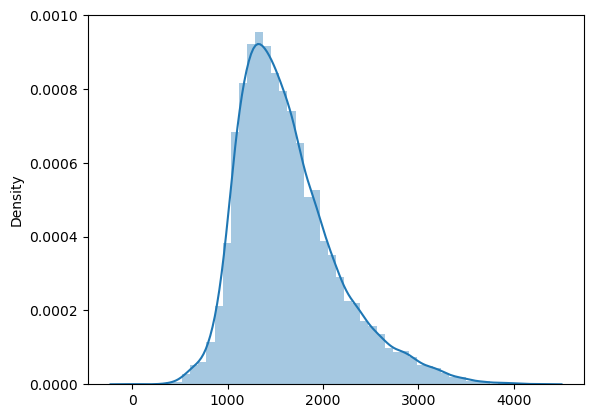

In [170]:
sns.distplot(y_pred)
plt.show()

In [1]:
!pip install nbconvert